In [ ]:

print("All libraries imported successfully!")


In [52]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


All libraries imported successfully!


In [7]:
df = pd.read_excel("C:/Users/ISHA/OneDrive/Desktop/air_quality_health_impact_data.csv.xlsx")


In [8]:
df.head

<bound method NDFrame.head of       RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0            1  187.270059  295.853039   13.038560    6.639263  66.161150   
1            2  475.357153  246.254703    9.984497   16.318326  90.499523   
2            3  365.996971   84.443191   23.111340   96.317811  17.875850   
3            4  299.329242   21.020609   14.273403   81.234403  48.323616   
4            5   78.009320   16.987667  152.111623  121.235461  90.866167   
...        ...         ...         ...         ...         ...        ...   
5806      5807  171.112762   11.246387  197.984628  158.643107  17.743678   
5807      5808  490.691667  275.340762   55.774170  132.336871  29.334724   
5808      5809  314.841798   41.892699  184.708551   82.105823  68.334578   
5809      5810  208.080473  165.533785  199.177255  100.796385  87.586488   
5810      5811   83.269257   82.216262  119.968244  193.440691  79.849177   

              O3  Temperature   Humidity  Win

In [9]:
df.info

<bound method DataFrame.info of       RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0            1  187.270059  295.853039   13.038560    6.639263  66.161150   
1            2  475.357153  246.254703    9.984497   16.318326  90.499523   
2            3  365.996971   84.443191   23.111340   96.317811  17.875850   
3            4  299.329242   21.020609   14.273403   81.234403  48.323616   
4            5   78.009320   16.987667  152.111623  121.235461  90.866167   
...        ...         ...         ...         ...         ...        ...   
5806      5807  171.112762   11.246387  197.984628  158.643107  17.743678   
5807      5808  490.691667  275.340762   55.774170  132.336871  29.334724   
5808      5809  314.841798   41.892699  184.708551   82.105823  68.334578   
5809      5810  208.080473  165.533785  199.177255  100.796385  87.586488   
5810      5811   83.269257   82.216262  119.968244  193.440691  79.849177   

              O3  Temperature   Humidity  W

In [10]:
df.describe

<bound method NDFrame.describe of       RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0            1  187.270059  295.853039   13.038560    6.639263  66.161150   
1            2  475.357153  246.254703    9.984497   16.318326  90.499523   
2            3  365.996971   84.443191   23.111340   96.317811  17.875850   
3            4  299.329242   21.020609   14.273403   81.234403  48.323616   
4            5   78.009320   16.987667  152.111623  121.235461  90.866167   
...        ...         ...         ...         ...         ...        ...   
5806      5807  171.112762   11.246387  197.984628  158.643107  17.743678   
5807      5808  490.691667  275.340762   55.774170  132.336871  29.334724   
5808      5809  314.841798   41.892699  184.708551   82.105823  68.334578   
5809      5810  208.080473  165.533785  199.177255  100.796385  87.586488   
5810      5811   83.269257   82.216262  119.968244  193.440691  79.849177   

              O3  Temperature   Humidity 

In [11]:
df.size

87165

In [12]:
df.shape

(5811, 15)

In [13]:
df.dtypes

RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases         int64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
HealthImpactClass        int64
dtype: object

In [14]:
df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [17]:
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [18]:
#EDA

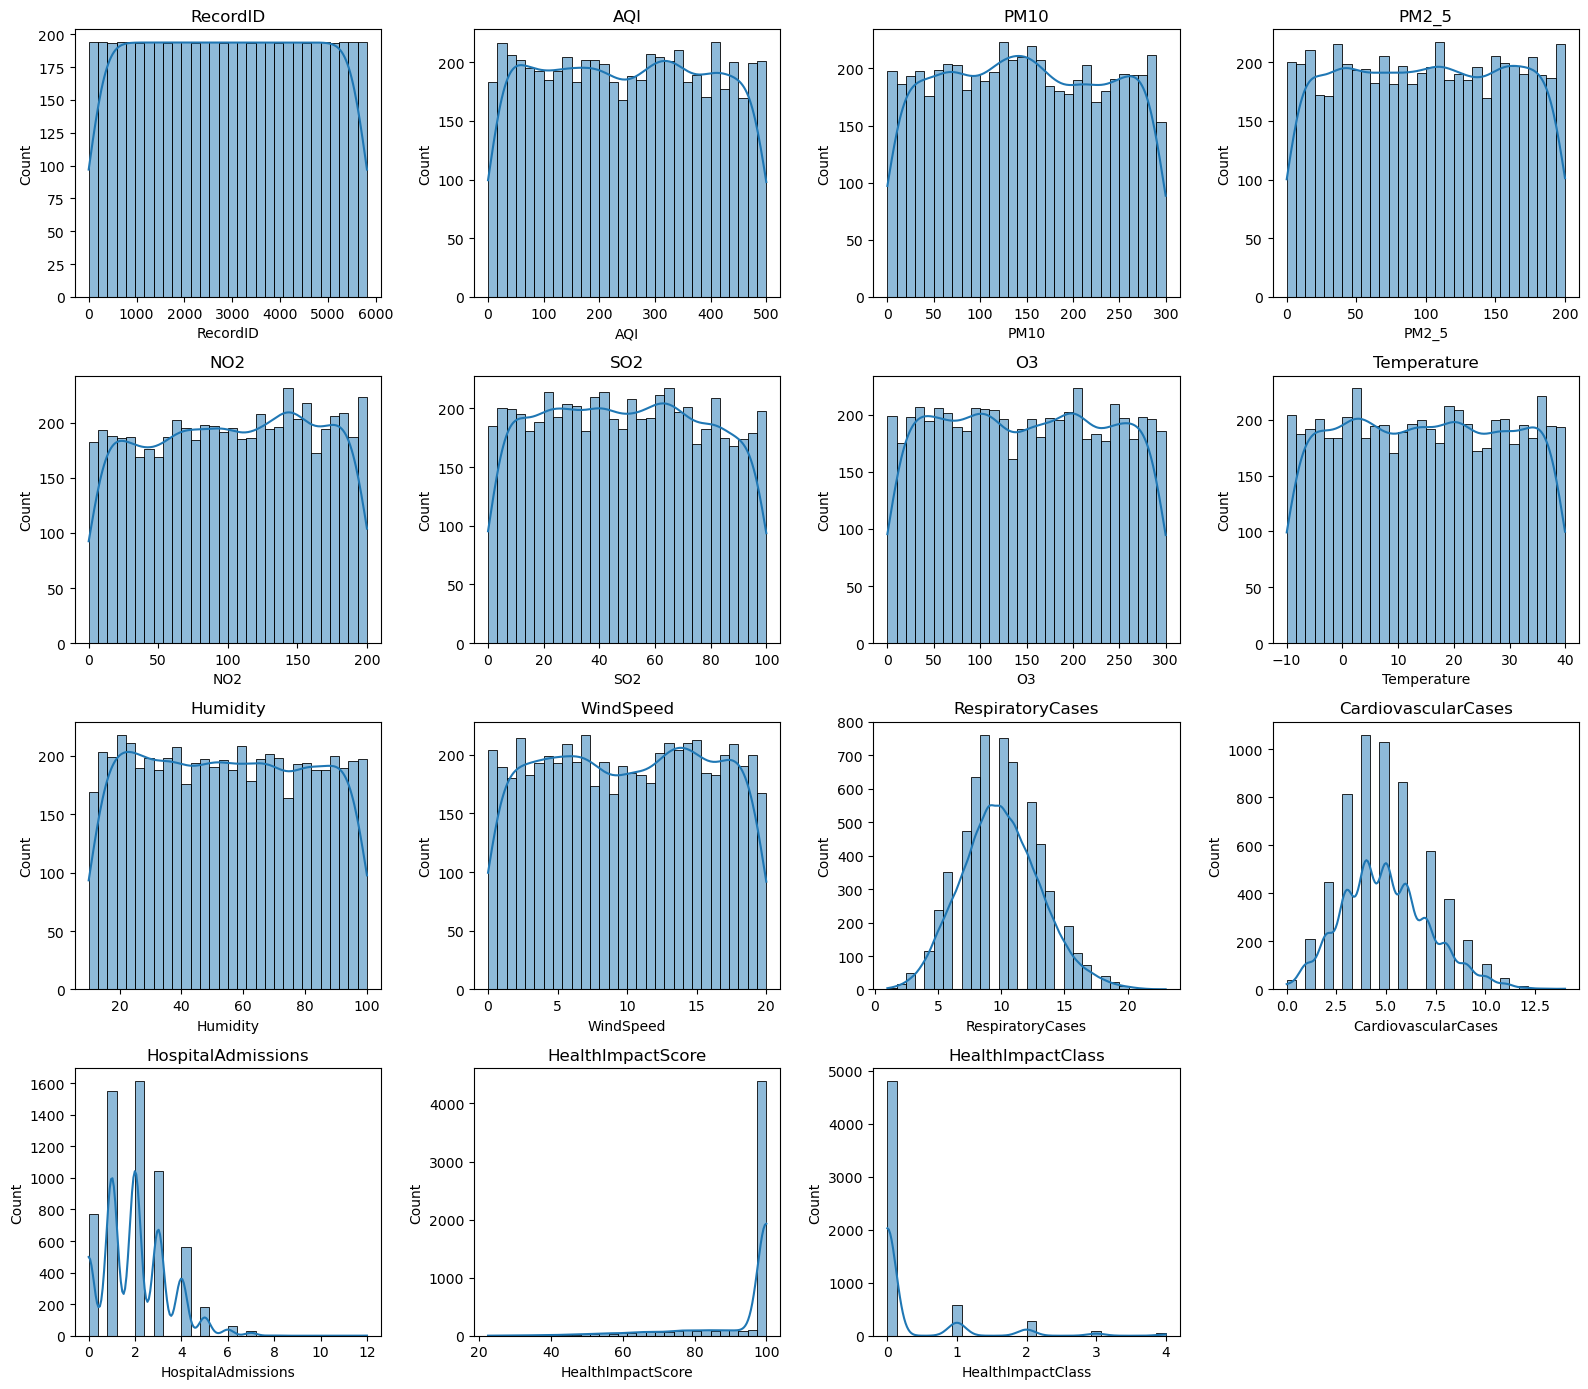

In [19]:
# STEP 2.1 — Histograms for all numeric features

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 14))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)      # adjust grid size based on number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


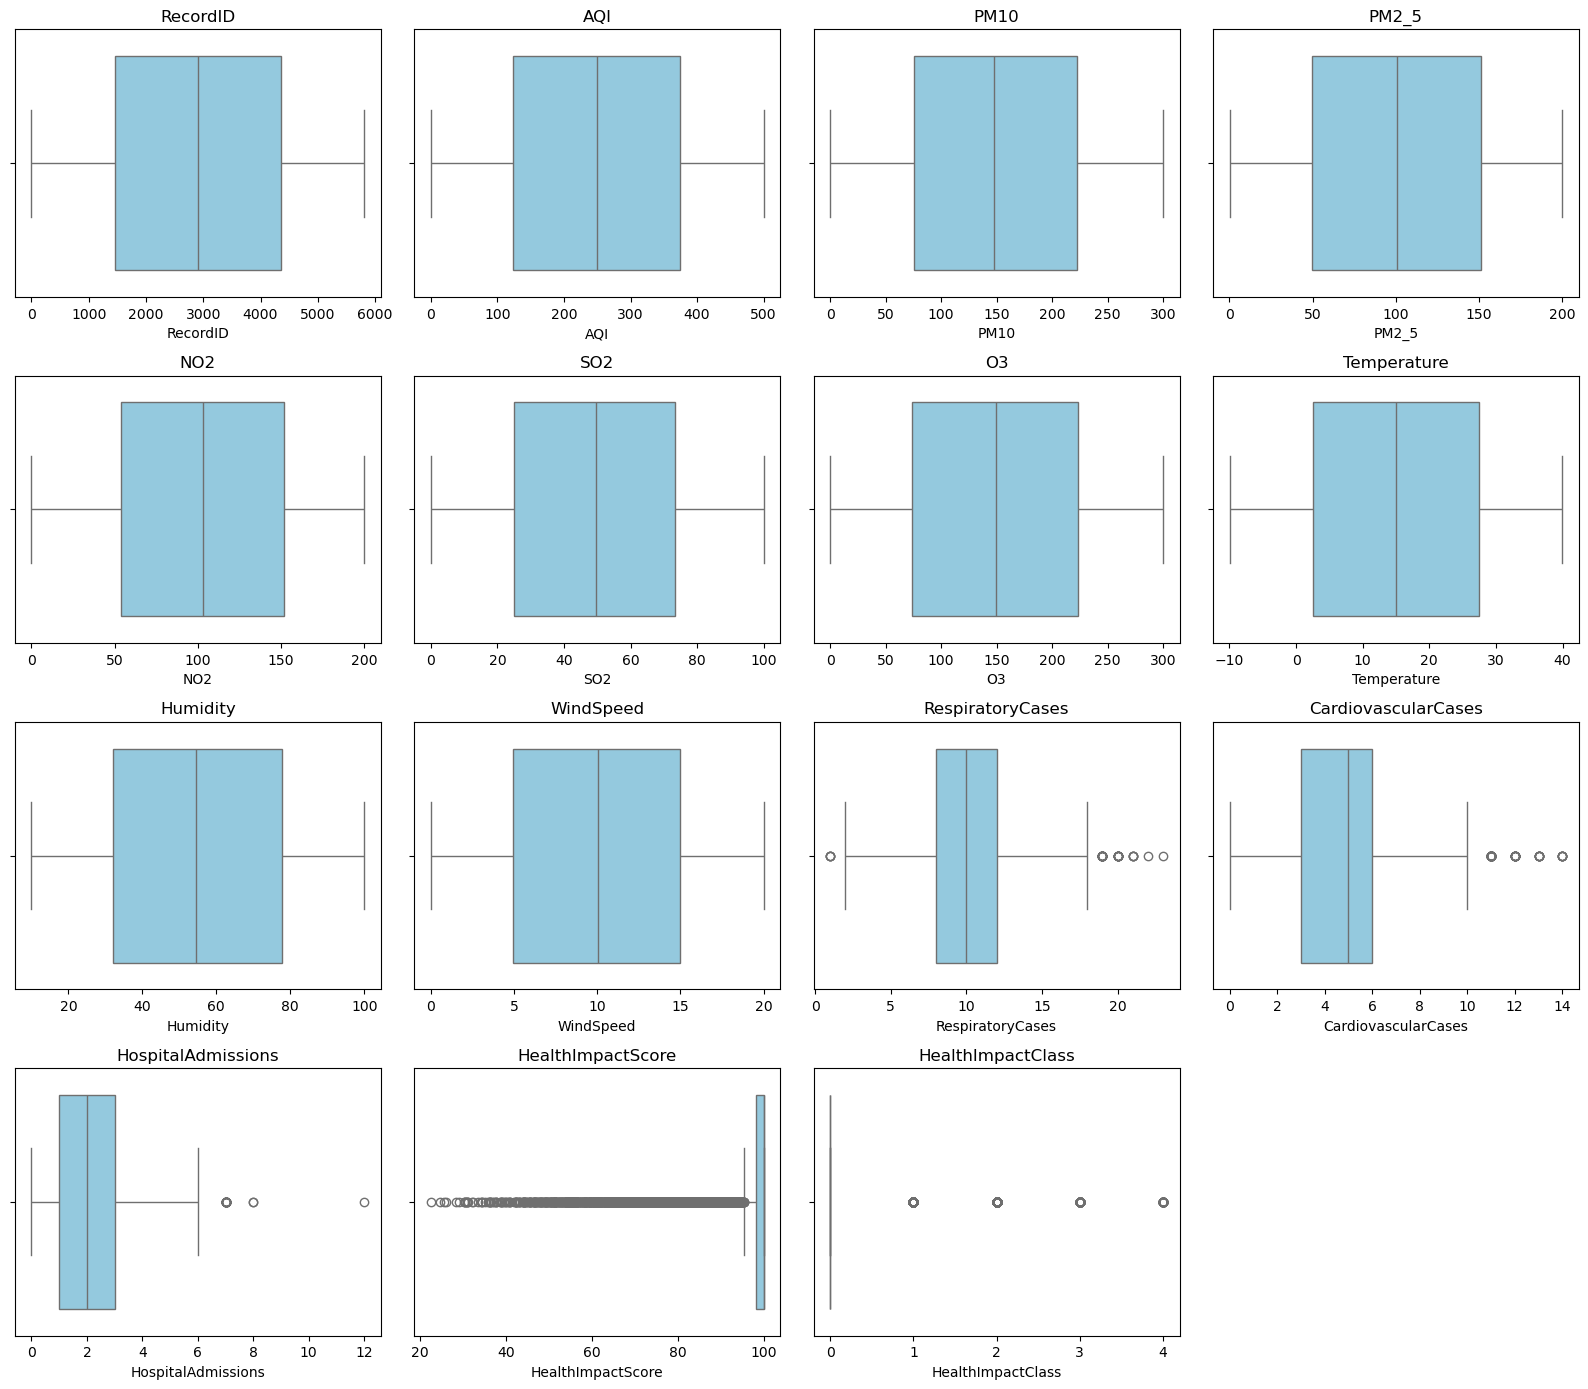

In [20]:
# STEP 2.2 — BOXPLOTS FOR ALL NUMERIC FEATURES

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 14))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


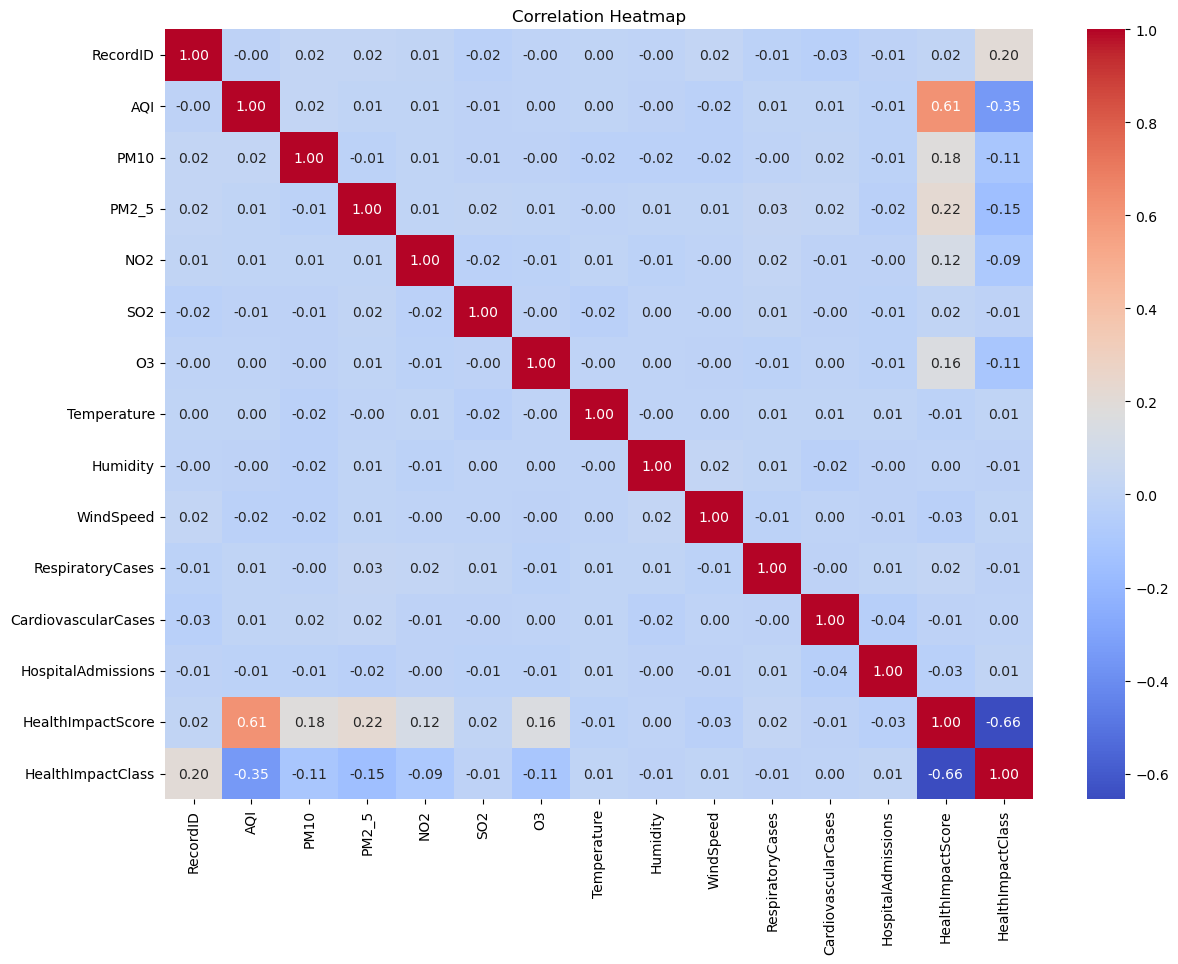

In [21]:
# STEP 2.3 — Correlation Heatmap

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


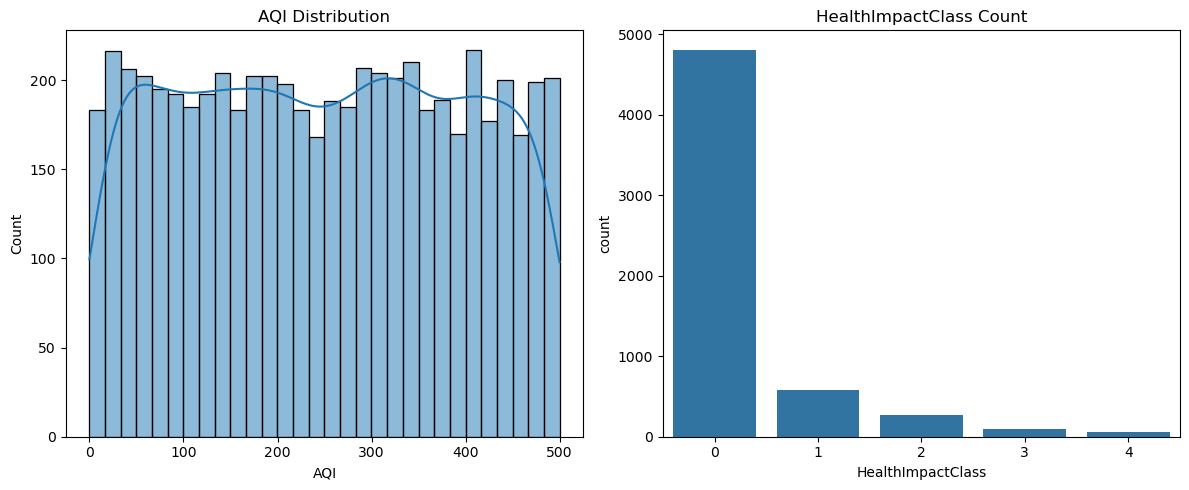

HealthImpactClass
0    4808
1     579
2     273
3      95
4      56
Name: count, dtype: int64


In [22]:
# STEP 2.4 — TARGET DISTRIBUTION

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title("AQI Distribution")

plt.subplot(1,2,2)
sns.countplot(data=df, x='HealthImpactClass')
plt.title("HealthImpactClass Count")

plt.tight_layout()
plt.show()

print(df['HealthImpactClass'].value_counts())


In [23]:
#STEP 3 —Data Preprocessing

In [24]:
# Step 3.1 — Drop useless columns
df_reg = df.drop(columns=['RecordID'])

df_reg.head()


,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0


In [25]:
# Step 3.2 — Define Features (X) and Target (y)

# Target for regression
y = df_reg['AQI']

# Drop target and HealthImpactClass to keep only useful features
X = df_reg.drop(columns=['AQI', 'HealthImpactClass'])

# Show shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X.head()


X shape: (5811, 12)
y shape: (5811,)


,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore
0,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041
1,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000
2,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000
3,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000
4,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643


In [29]:
# Step 3.3 — Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4648, 12)
X_test shape: (1163, 12)
y_train shape: (4648,)
y_test shape: (1163,)


In [30]:
# Step 3.4 — Scaling (StandardScaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

print("Scaling completed! Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


Scaling completed! Shapes:
X_train_scaled: (4648, 12)
X_test_scaled: (1163, 12)


In [31]:
# Model Building

In [32]:
# STEP 4.1 — Linear Regression Baseline Model

from sklearn.linear_model import LinearRegression

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("---- Linear Regression Results ----")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)


---- Linear Regression Results ----
MAE: 94.91695063015995
RMSE: 110.35913139992446
R² Score: 0.4353908891339666


In [33]:
# STEP 4.2 — Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("---- Random Forest Results ----")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)


---- Random Forest Results ----
MAE: 74.24087785968524
RMSE: 96.06669612357541
R² Score: 0.5721642765575157


In [34]:
# STEP 4.3 — Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=None,
    random_state=42
)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print("---- Decision Tree Results ----")
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R² Score:", r2_dt)


---- Decision Tree Results ----
MAE: 93.32473450535724
RMSE: 130.73189300628638
R² Score: 0.2076912825670839


In [36]:
#Random Forest clearly wins
 #RF is syllabus-friendly
 #Easy to explain (bagging, ensemble of trees)
 #Provides good accuracy for synthetic data

In [39]:
# STEP 5 — Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best R2 Score: 0.5351188160826135


In [42]:
# STEP 6 — Train Final Random Forest Model with Best Parameters

best_params = grid_search.best_params_

final_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train final model
final_rf.fit(X_train, y_train)

# Predict
y_pred_final = final_rf.predict(X_test)

# Evaluate
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)
r2_final = r2_score(y_test, y_pred_final)

print("---- FINAL Random Forest Results ----")
print("MAE:", mae_final)
print("RMSE:", rmse_final)
print("R² Score:", r2_final)


---- FINAL Random Forest Results ----
MAE: 73.87075954730024
RMSE: 95.45593133932101
R² Score: 0.5775870993668981


                Feature  Importance
11    HealthImpactScore    0.698413
1                 PM2_5    0.053428
4                    O3    0.045966
0                  PM10    0.041183
2                   NO2    0.032343
6              Humidity    0.027698
3                   SO2    0.025494
5           Temperature    0.022409
7             WindSpeed    0.022394
8      RespiratoryCases    0.013199
9   CardiovascularCases    0.009964
10   HospitalAdmissions    0.007508


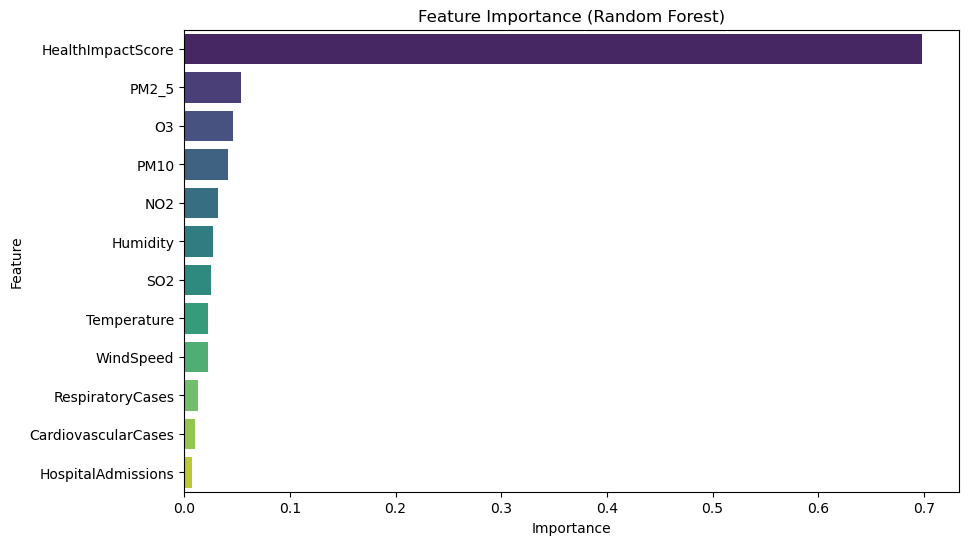

In [43]:
# STEP 7 — Feature Importance

import numpy as np

importances = final_rf.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [44]:
import joblib

# Save final model
joblib.dump(final_rf, "AQI_random_forest_model.pkl")

# Save scaler (for linear/SVM models if needed)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [45]:
# STEP 9 — Prediction Function (Using Final Model)

def predict_aqi(input_data):
    """
    input_data: dictionary with feature names and values
    Example:
    {
        'PM10': 150,
        'PM2_5': 80,
        'NO2': 25,
        'SO2': 10,
        'O3': 50,
        'Temperature': 25,
        'Humidity': 60,
        'WindSpeed': 5,
        'RespiratoryCases': 5,
        'CardiovascularCases': 2,
        'HospitalAdmissions': 1,
        'HealthImpactScore': 80
    }
    """

    # Convert input to DataFrame
    df_input = pd.DataFrame([input_data])

    # Predict using trained model
    prediction = final_rf.predict(df_input)[0]

    return prediction

print("Prediction function ready!")


Prediction function ready!


In [46]:
test_input = {
    'PM10': 100,
    'PM2_5': 50,
    'NO2': 30,
    'SO2': 20,
    'O3': 60,
    'Temperature': 25,
    'Humidity': 70,
    'WindSpeed': 5,
    'RespiratoryCases': 4,
    'CardiovascularCases': 2,
    'HospitalAdmissions': 1,
    'HealthImpactScore': 80
}

predicted_aqi = predict_aqi(test_input)
print("Predicted AQI:", predicted_aqi)


Predicted AQI: 145.65567820408032


In [47]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good", "No health risk."
    elif aqi <= 100:
        return "Satisfactory", "Minor breathing discomfort to sensitive people."
    elif aqi <= 200:
        return "Moderate", "Breathing discomfort to people with lung/heart disease, children, elderly."
    elif aqi <= 300:
        return "Poor", "Breathing discomfort on prolonged exposure."
    elif aqi <= 400:
        return "Very Poor", "Respiratory issues. Avoid outdoor activity."
    else:
        return "Severe", "Health impact even for healthy people. Stay indoors."


In [48]:
# Step 11 — AQI Recommendation Function

def aqi_recommendation(aqi):

    if aqi <= 50:
        category = "Good"
        advise = "Air quality is safe. You can freely go outside."
        
    elif aqi <= 100:
        category = "Satisfactory"
        advise = "Air quality is acceptable. Slight discomfort for extremely sensitive people."
        
    elif aqi <= 200:
        category = "Moderate"
        advise = "Sensitive groups may feel discomfort. Consider wearing a mask outside."
        
    elif aqi <= 300:
        category = "Poor"
        advise = "Avoid prolonged outdoor exposure. People with asthma should be careful."
        
    elif aqi <= 400:
        category = "Very Poor"
        advise = "Avoid outdoor activities. Use N95 masks if necessary."
        
    else:
        category = "Severe"
        advise = "Stay indoors. Air is hazardous even for healthy people."

    return category, advise

# Test with your predicted value
cat, rec = aqi_recommendation(predicted_aqi)
print("AQI Category:", cat)
print("Recommendation:", rec)


AQI Category: Moderate
Recommendation: Sensitive groups may feel discomfort. Consider wearing a mask outside.


In [50]:
## import joblib
import pandas as pd

# Load saved model & scaler
final_rf = joblib.load("AQI_random_forest_model.pkl")

# AQI Recommendation function
def aqi_recommendation(aqi):

    if aqi <= 50:
        return "Good", "Air quality is safe. You can freely go outside."
    elif aqi <= 100:
        return "Satisfactory", "Minor discomfort to extremely sensitive people."
    elif aqi <= 200:
        return "Moderate", "Sensitive groups may feel discomfort. Wear a mask if needed."
    elif aqi <= 300:
        return "Poor", "Avoid prolonged outdoor exposure."
    elif aqi <= 400:
        return "Very Poor", "Avoid outdoor activities. Use N95 masks."
    else:
        return "Severe", "Stay indoors. Air is hazardous."

# Interactive model input
print("------ Air Quality Prediction System ------")

PM10 = float(input("Enter PM10 value: "))
PM2_5 = float(input("Enter PM2.5 value: "))
NO2 = float(input("Enter NO2 value: "))
SO2 = float(input("Enter SO2 value: "))
O3 = float(input("Enter O3 value: "))
Temperature = float(input("Enter Temperature (°C): "))
Humidity = float(input("Enter Humidity (%): "))
WindSpeed = float(input("Enter Wind Speed: "))
RespCases = int(input("Enter Respiratory Cases: "))
CardioCases = int(input("Enter Cardiovascular Cases: "))
Hosp = int(input("Enter Hospital Admissions: "))
HealthScore = float(input("Enter Health Impact Score: "))

# Create input dict
input_data = {
    'PM10': PM10,
    'PM2_5': PM2_5,
    'NO2': NO2,
    'SO2': SO2,
    'O3': O3,
    'Temperature': Temperature,
    'Humidity': Humidity,
    'WindSpeed': WindSpeed,
    'RespiratoryCases': RespCases,
    'CardiovascularCases': CardioCases,
    'HospitalAdmissions': Hosp,
    'HealthImpactScore': HealthScore
}

# Convert to DataFrame
df_input = pd.DataFrame([input_data])

# Predict AQI
predicted_aqi = final_rf.predict(df_input)[0]

# Get category + advice
category, advice = aqi_recommendation(predicted_aqi)

print("\n------ Prediction Result ------")
print("Predicted AQI:", predicted_aqi)
print("Category:", category)
print("Recommendation:", advice)


------ Air Quality Prediction System ------


Enter PM10 value:  100
Enter PM2.5 value:  50
Enter NO2 value:  30
Enter SO2 value:  20
Enter O3 value:  60
Enter Temperature (°C):  25
Enter Humidity (%):  70
Enter Wind Speed:  5
Enter Respiratory Cases:  4
Enter Cardiovascular Cases:  2
Enter Hospital Admissions:  1
Enter Health Impact Score:  80



------ Prediction Result ------
Predicted AQI: 145.65567820408032
Category: Moderate
Recommendation: Sensitive groups may feel discomfort. Wear a mask if needed.
